<a href="https://colab.research.google.com/github/dspierre/ConsoleApp2/blob/master/clustering_et_timeserie_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering 

In [10]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
from sklearn.metrics import confusion_matrix
import sys
import missingno
from sklearn.neighbors import KNeighborsClassifier
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
df = pd.read_csv('/content/sample_data/CC GENERAL.csv', sep = ",")
df

FileNotFoundError: ignored

In [ ]:
df.describe().T

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
pip install  missingno

In [ ]:
import missingno
missingno.matrix(df,figsize=(10,5), fontsize=12);

In [ ]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

In [ ]:
df_v=pd.DataFrame(df['TENURE'].value_counts())
plot = df_v.plot.pie(y='TENURE', figsize=(8, 8));

In [ ]:
sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = df,palette='Pastel1');

In [ ]:
sns.boxplot(x = 'TENURE', y = 'BALANCE_FREQUENCY', data = df,palette='autumn');

In [ ]:
sns.scatterplot(x='CREDIT_LIMIT', y='PRC_FULL_PAYMENT', data=df,color='purple');

In [ ]:
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df,color='purple');

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] =(20,40)
for num in range(0,17):
    ax = plt.subplot(9,2,num+1)
    col = df.columns[num]
    sns.distplot(df[col], ax=ax)
    
plt.savefig('all_dist.png')

In [ ]:
plt.rcParams['figure.figsize'] = (15,8)
sns.distplot(df['BALANCE'],bins=150, color='red')
plt.title('Distribution of Balance', size=20)
plt.xlabel('Balance')

In [ ]:
plt.rcParams['figure.figsize'] = (15,9)

sns.countplot(y=df['BALANCE_FREQUENCY'],order = df['BALANCE_FREQUENCY'].value_counts().index)
plt.ylabel('Balance Frequncy Score (0-1)')
plt.title('Counts of Balance Frequency Score', fontsize=20)

In [ ]:
plt.rcParams['figure.figsize'] = (15,8)
sns.distplot(df['PURCHASES'], color='orange', bins=150)
plt.title('Distribution of Purchases', size=20)
plt.xlabel('Purchases')

In [ ]:
plt.subplot(1,2,1)
sns.distplot(df['ONEOFF_PURCHASES'],color='green')
plt.title('Distribution of One Off Purchase', fontsize = 20)
plt.xlabel('Amount')
plt.subplot(1,2,2)
sns.distplot(df['INSTALLMENTS_PURCHASES'], color='red')
plt.title('Distribution of Installment Purchase', fontsize = 20)
plt.xlabel('Amount')

In [ ]:
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(2,2,1)
sns.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Purchases', fontsize =20)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Balance', fontsize =20)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(df['ONEOFF_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And One Off Purchases', fontsize =20)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(df['INSTALLMENTS_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit And Installments Purchases', fontsize =20)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

plt.savefig('creditlimie_scatter.png')

In [ ]:
plt.rcParams['figure.figsize'] = (15,20)

plt.subplot(3,2,1)
sns.violinplot(df['BALANCE_FREQUENCY'])
plt.title('Balance Frequency', fontsize =20)
plt.xlabel('Balance Frequency')

plt.subplot(3,2,2)
sns.violinplot(df['PURCHASES_FREQUENCY'])
plt.title('Purchase Frequency', fontsize =20)
plt.xlabel('Purchase Frequency')

plt.subplot(3,2,3)
sns.violinplot(df['ONEOFF_PURCHASES_FREQUENCY'])
plt.title('one off purchase Frequency', fontsize =20)
plt.xlabel('one off purchase Frequency')

plt.subplot(3,2,4)
sns.violinplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.title('Purchase installment Frequency', fontsize =20)
plt.xlabel('Purchase installment Frequency')

plt.subplot(3,2,5)
sns.violinplot(df['CASH_ADVANCE_FREQUENCY'])
plt.title('Cash Advance Frequency', fontsize =20)
plt.xlabel('Cash Advance Frequency')

plt.savefig('violin_frequency.png')


In [ ]:

plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(1,2,1)
sns.boxenplot(df['PURCHASES_TRX'])
plt.title('Total Number of Purcahses')
plt.xlabel('Purchases')

plt.subplot(1,2,2)
sns.boxenplot(df['CASH_ADVANCE_TRX'])
plt.title('Total Number of Transaction Made with Cash Advance')
plt.xlabel('Purchases')

In [ ]:
sns.heatmap(df.corr())

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(df['TENURE'], palette='rainbow')
plt.title('Counts of Tenures', fontsize = 20)
plt.xlabel('Months')

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

In [ ]:
# model building, elbow method
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(scaled_df)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow Method for Finding Optimal Clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('wcss')

In [ ]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
label = km.fit_predict(scaled_df)

df['label'] = label

In [ ]:
df['label'] = label
df['label']

In [ ]:
df['constant'] = 'constant'

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] =(20,40)
for num in range(0,17):
    ax = plt.subplot(5,4,num+1)
    col = df.columns[num]
    sns.stripplot(df['constant'],df[col], ax=ax, hue=df['label'])
    plt.xlabel('constant')
plt.savefig('clusters.png')

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df['BALANCE'],df['PURCHASES'], hue=df['label'], palette=['blue','red','yellow','green'])
plt.title('Clusters of Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')

#compaign marketing  clustering

In [ ]:
df = pd.read_csv('/content/sample_data/marketing_campaign.csv', sep ="\t")
df

In [ ]:
df.info()

In [ ]:
missingno.matrix(df,figsize=(10,5), fontsize=12);

In [ ]:
df.isna().sum()

# dataprocessing

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X = df['Income'].values.reshape(-1,1)
X = imputer.fit_transform(X) 
df['Income'] = X

In [ ]:
pd.unique(df_drop.Education)

In [ ]:
df.isna().sum()

#datavisulisation

In [ ]:
df_v=pd.DataFrame(df['Marital_Status'].value_counts())
plot = df_v.plot.pie(y='Marital_Status', figsize=(10, 10));

In [ ]:
df_v=pd.DataFrame(df['Education'].value_counts())
plot = df_v.plot.pie(y='Education', figsize=(9, 9));

In [ ]:
sns.histplot(data=df, x="Year_Birth")

In [ ]:
df

In [ ]:
df_drop= df.drop(['ID','Dt_Customer'], axis=1)
df_drop

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
# Encode single column status
df_drop.Education = le.fit_transform(df_drop.Education)
df_drop.head()

In [ ]:
pd.unique(df_drop.Marital_Status)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
# Encode single column status
df_drop.Marital_Status = le.fit_transform(df_drop.Marital_Status)
df_drop.head()

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
score_pca = scaler.fit_transform(df_drop)
score_pca

# modele kmeans

In [ ]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(scaled_df)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow Method for Finding Optimal Clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_pca = KMeans(n_clusters=5,random_state=17,init='k-means++')
y_kmeans = kmeans_pca.fit(score_pca)
y_kmeans 

In [ ]:
kmeans_labels = kmeans_pca.fit_predict(score_pca)
pd.Series(kmeans_labels).value_counts()

In [ ]:
kmeans_pca.cluster_centers_

In [ ]:
df_drop_label=kmeans_pca.labels_
df_drop_label

In [ ]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=2, batch_size=10)
ipca.fit(df_drop)

In [ ]:
X_red = ipca.transform(df_drop)  # doctest: +SKIP
scaler = StandardScaler()

scaler.fit(X_red)
X_red = scaler.transform(X_red)
print(X_red)

In [ ]:
kmean = KMeans(init='random', n_clusters=12, max_iter=1500, n_init=1500)
cluster = kmean.fit(X_red)
c = cluster.labels_
centers = kmean.cluster_centers_
print(centers)
print(kmean.get_params())
colors = ["red", "blue", "green", "orange", "purple"]

In [ ]:
X_red = ipca.transform(df_drop)  # doctest: +SKIP
scaler = StandardScaler()
scaler.fit(X_red)
X_red = scaler.transform(X_red)
print(X_red)

In [ ]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
label = km.fit_predict(score_pca)
df['label'] = label

In [ ]:
df['label'] = label


In [ ]:
label

# modele clustering

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
score_pca = scaler.fit_transform(df_drop)
score_pca

In [ ]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(score_pca)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow Method for Finding Optimal Clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_pca = KMeans(n_clusters=4,random_state=17,init='k-means++')
y_kmeans = kmeans_pca.fit(score_pca)
y_kmeans 

In [ ]:
kmeans_labels = kmeans_pca.fit_predict(score_pca)
pd.Series(kmeans_labels).value_counts()

In [ ]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
label = km.fit_predict(score_pca)
df['label'] = label

In [ ]:
from matplotlib import pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=100).fit(df_drop)
df_drop["cluster"] = kmeans.labels_
pca = PCA()
df_pca=pca.fit_transform(df_drop)
kmeans.labels_

In [ ]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=2, batch_size=10)
ipca.fit(df_pca)
X_red=ipca.transform(df_pca) # doctest: +SKIP
centers = kmeans.cluster_centers_
centers

In [ ]:
colors=["red", "blue","green",'yellow']
c=list(df_pca["cluster"])
cc = [colors[i] for i in c]
plt.scatter(X_red[:,0], X_red[:,1], c=cc)
plt.show()

# time  series 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings(action='ignore')
import pandas_datareader as pdr
from fbprophet import Prophet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
df = pd.read_csv('/content/sample_data/GlobalLandTemperaturesByCity.csv', sep =",")
df

In [ ]:
GlobalLandTemperaturesByCity_df = pd.read_csv('/content/sample_data/GlobalLandTemperaturesByCity.csv', sep=',')

In [ ]:
GlobalLandTemperaturesByCity_df.head()

In [ ]:
import missingno
missingno.matrix(df,figsize=(10,5), fontsize=12);

In [ ]:
df.isna().sum()

In [ ]:
pourcentate=100*GlobalLandTemperaturesByCity_df.AverageTemperature.isnull().sum()/len(GlobalLandTemperaturesByCity_df.AverageTemperature)
print(pourcentate)

In [ ]:
pourcentate2=100*GlobalLandTemperaturesByCity_df.AverageTemperatureUncertainty.isnull().sum()/len(GlobalLandTemperaturesByCity_df.AverageTemperatureUncertainty)
print(pourcentate2)

In [ ]:
df_Denmark= GlobalLandTemperaturesByCity_df.loc[GlobalLandTemperaturesByCity_df.Country =='Denmark']
df_Denmark

In [ ]:
df_Denmark.isna().sum()

In [ ]:
pourcentate2=100*GlobalLandTemperaturesByCity_df.AverageTemperature.isnull().sum()/len(GlobalLandTemperaturesByCity_df.AverageTemperature)
print(pourcentate2)

In [ ]:
pourcentate2=100*GlobalLandTemperaturesByCity_df.AverageTemperatureUncertainty.isnull().sum()/len(GlobalLandTemperaturesByCity_df.AverageTemperatureUncertainty)
print(pourcentate2)

In [ ]:
df2=df_Denmark
df2 = df2.drop(['City','Latitude', 'Longitude'], axis=1)
df2

In [ ]:
# median of the specific column
df2.loc[:,"AverageTemperature"].median()

In [ ]:
# median of the specific column
df2.loc[:,"AverageTemperatureUncertainty"].median()

In [ ]:
median = df2['AverageTemperature'].median()
df2['AverageTemperature'].fillna(median, inplace=True)
median = df2['AverageTemperatureUncertainty'].median()
df2['AverageTemperatureUncertainty'].fillna(median, inplace=True)
df2.isnull().sum()

In [ ]:
df2= df2.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df2

In [ ]:
df2['ds'] = pd.DatetimeIndex(df2['ds'])
df2.dtypes

In [ ]:
df2= df2.rename(columns={'dt': 'ds', 'AverageTemperature':'y'})
df2

In [ ]:
df2 = df2.rename(columns={'dt': 'ds','y': 'y'})
df2.head(5)

In [ ]:
m = Prophet()
m.fit(df2)

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

#  regression  

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings(action='ignore')
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
df = pd.read_csv('/content/sample_data/cubic_zirconia.csv', sep=',')
df

In [ ]:
import missingno
missingno.matrix(df,figsize=(10,5), fontsize=12);

In [ ]:
df.isna().sum()

In [ ]:
median = df['depth'].median()
df['depth'].fillna(median, inplace=True)
median = df['depth'].median()
df['depth'].fillna(median, inplace=True)
df.isnull().sum()

In [ ]:
pd.unique(df.color)

In [ ]:
pd.unique(df.cut)

In [ ]:
pd.unique(df.clarity)

In [ ]:
pd.unique(df.table)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.color = le.fit_transform(df.color)
df.head()

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.cut = le.fit_transform(df.cut)
df.head()

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.clarity = le.fit_transform(df.clarity)
df.head()

In [ ]:
df= df.drop(['Unnamed: 0'], axis=1)
df

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
(scaler.fit(df))
StandardScaler()

# datavisualisation

In [ ]:
cordia=df.corr()
print(cordia)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(cordia,annot=True, square =False,  cmap="coolwarm")

# DATAVISUALISATION

In [ ]:
sns.distplot(df.price,kde=False,bins=20)

In [ ]:
sns.countplot('cut', data=df)
plt.show()

In [ ]:
sns.countplot('color', data=df)
plt.show()

In [ ]:
sns.countplot('clarity', data=df)
plt.show()

In [ ]:
df.isna().sum()

In [ ]:
y= df['price']
# methode 2 
X=df.drop(["price"],axis=1)

In [ ]:
y

In [ ]:
X

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train

In [ ]:
X_train.isna().sum()

In [ ]:
X_test

In [ ]:
X_test.isna().sum()

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
y_pred

In [ ]:
print("Coefficients: \n", regr.coef_)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

In [ ]:

dtr = DecisionTreeRegressor()
print(dtr)
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best') 

In [ ]:
dtr.fit(X_train, y_train)
y8pred = dtr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
from sklearn.model_selection import train_test_split
import sys
from sklearn.metrics import confusion_matrix
import missingno
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV as GCV
from sklearn.neighbors import KNeighborsClassifier
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier as KNN 

In [ ]:
df = pd.read_csv("/content/sample_data/bodyPerformance.csv")
df.head(10)

In [ ]:
import missingno
missingno.matrix(df,figsize=(10,5), fontsize=12);

In [ ]:
df.isna().sum()

In [ ]:
df_max_Age=df['age'].max()
df_max_Age

In [ ]:
df_min_Age=df['age'].min()
df_min_Age

In [ ]:
df_min_height_cm=df['height_cm'].min()
df_min_height_cm

In [ ]:
df_min_height_cm=df['height_cm'].max()
df_min_height_cm

In [ ]:
df_min_height_cm=df['weight_kg'].max()
df_min_height_cm


In [ ]:
df_min_height_cm=df['weight_kg'].min()
df_min_height_cm

In [ ]:
df_min_height_cm=df['body fat_%'].min()
df_min_height_cm


In [ ]:
df_min_height_cm=df['body fat_%'].max()
df_min_height_cm

In [ ]:
pd.unique(df.age)

In [ ]:
df = df.rename(columns={'class': 'Classes'})
df

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder =LabelEncoder()
le = LabelEncoder()
df.gender = le.fit_transform(df.gender)
df.head(10)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder =LabelEncoder()
le = LabelEncoder()
df.Classes = le.fit_transform(df.Classes)
df.head(10)

In [ ]:
cordia=df.corr()
print(cordia)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(cordia,annot=True, square =False,  cmap="coolwarm")

In [ ]:
y= df['Classes']
# methode 2 
X=df.drop(["Classes"],axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
#knn 
from sklearn.neighbors import KNeighborsClassifier as KNN 
ngh = KNN(n_neighbors=3)
Kb = ngh.fit(X_train,y_train)
print(ngh.classes_,'\n',ngh.effective_metric_,ngh.effective_metric_params_,ngh.outputs_2d_)

In [ ]:
Ypred_knn=Kb.predict(X_test)
Ypred_knn

In [ ]:
sns.heatmap(confusion_matrix(y_test,Ypred_knn),annot=True)
plt.show()

In [ ]:
Ypred_knn=Kb.predict(X_test)
print(Ypred_knn[2])

In [ ]:

acc(y_test,Ypred_knn)

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,Ypred_knn, average='macro')

In [ ]:
Knn = KNeighborsClassifier(algorithm = 'brute')

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

In [ ]:
y_pred_knn_cv=grid_search.predict(X_test)
print(y_pred_knn_cv[4])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

In [ ]:
Ypred_svc=clf.predict(X_test)
Ypred_svc

In [ ]:
sns.heatmap(confusion_matrix(y_test,Ypred_svc),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
clf.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
cvc=grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV as GCV
acc(y_test,Ypred_svc)

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,Ypred_svc, average='macro')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(X_train,y_train)
gbc

In [ ]:
Ypred_gbc=gbc.predict(X_test)
Ypred_gbc

In [ ]:
sns.heatmap(confusion_matrix(y_test, Ypred_gbc),annot=True)
plt.show()

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,Ypred_gbc, average='macro')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
classifier = SVC()
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(classifier, X, y, cv=skf)
print("Cross-validation scores: {}".format(scores))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(X_train,y_train)
gbc

In [ ]:
Ypred_gbc=gbc.predict(X_test)
Ypred_gbc

In [ ]:
sns.heatmap(confusion_matrix(y_test, Ypred_gbc),annot=True)
plt.show()

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,Ypred_gbc, average='macro')

In [ ]:
Ypred_gbc_test=gbc.predict(X_test)
print(Ypred_gbc_test[1])

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,Ypred_gbc, average='macro')

In [ ]:
Ypred_gbc_test=gbc.predict(X_test)
print(Ypred_gbc_test[1])

In [ ]:
Ypred_gbc_train=gbc.predict(X_train)
print(Ypred_gbc_train[1])

In [ ]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV as GCV
acc(y_test,Ypred_gbc)

In [ ]:
gbc.get_params()

In [ ]:
# une voiture bleu roule a 130 km/h pendant 45 minutes puis s arrete pendant 30 minutes et 
#reprend pendant 15 min  vitesse de 80km/h arrete pendant 8  minutes puis 
# à la  meme  vitesse de 120km/h jusqu'a arriver

#  Etude de la  pluie  en  Australie

In [ ]:
!pip install pyspark==3.0.1 py4j==0.10.9 

     |████████████████████████████████| 204.2 MB 34 kB/s 
     |████████████████████████████████| 198 kB 49.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=90c7de0541a972b6cef4ad074fce6d19e52f3207cbb7b859ce70f3ba11810be2
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('Rechauffement climatique')\
        .getOrCreate()

In [ ]:
csv_file = '/content/sample_data/weatherAUS.csv'
df = spark.read.csv(csv_file)
# Reading JSON file

In [ ]:
# Before structuring schema
data = spark.read.csv(
    '/content/sample_data/weatherAUS.csv',
    sep = ',',
    header = True,
    )

data.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- Evaporation: string (nullable = true)
 |-- Sunshine: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- Cloud9am: string (nullable = true)
 |-- Cloud3pm: string (nullable = true)
 |-- Temp9am: string (nullable = true)
 |-- Temp3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



In [ ]:
data.schema

StructType(List(StructField(Date,StringType,true),StructField(Location,StringType,true),StructField(MinTemp,StringType,true),StructField(MaxTemp,StringType,true),StructField(Rainfall,StringType,true),StructField(Evaporation,StringType,true),StructField(Sunshine,StringType,true),StructField(WindGustDir,StringType,true),StructField(WindGustSpeed,StringType,true),StructField(WindDir9am,StringType,true),StructField(WindDir3pm,StringType,true),StructField(WindSpeed9am,StringType,true),StructField(WindSpeed3pm,StringType,true),StructField(Humidity9am,StringType,true),StructField(Humidity3pm,StringType,true),StructField(Pressure9am,StringType,true),StructField(Pressure3pm,StringType,true),StructField(Cloud9am,StringType,true),StructField(Cloud3pm,StringType,true),StructField(Temp9am,StringType,true),StructField(Temp3pm,StringType,true),StructField(RainToday,StringType,true),StructField(RainTomorrow,StringType,true)))

In [ ]:
data.head(10)

[Row(Date='2008-12-01', Location='Albury', MinTemp='13.4', MaxTemp='22.9', Rainfall='0.6', Evaporation='NA', Sunshine='NA', WindGustDir='W', WindGustSpeed='44', WindDir9am='W', WindDir3pm='WNW', WindSpeed9am='20', WindSpeed3pm='24', Humidity9am='71', Humidity3pm='22', Pressure9am='1007.7', Pressure3pm='1007.1', Cloud9am='8', Cloud3pm='NA', Temp9am='16.9', Temp3pm='21.8', RainToday='No', RainTomorrow='No'),
 Row(Date='2008-12-02', Location='Albury', MinTemp='7.4', MaxTemp='25.1', Rainfall='0', Evaporation='NA', Sunshine='NA', WindGustDir='WNW', WindGustSpeed='44', WindDir9am='NNW', WindDir3pm='WSW', WindSpeed9am='4', WindSpeed3pm='22', Humidity9am='44', Humidity3pm='25', Pressure9am='1010.6', Pressure3pm='1007.8', Cloud9am='NA', Cloud3pm='NA', Temp9am='17.2', Temp3pm='24.3', RainToday='No', RainTomorrow='No'),
 Row(Date='2008-12-03', Location='Albury', MinTemp='12.9', MaxTemp='25.7', Rainfall='0', Evaporation='NA', Sunshine='NA', WindGustDir='WSW', WindGustSpeed='46', WindDir9am='W', Wi

In [ ]:
data.show()

+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|2008-12-01|  Albury|   13.4|   22.9|     0.6|         NA|      NA|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       8|      NA|   16.9|   21.8|       No|          No|
|2008-12-02|

In [ ]:
import  pandas as  pd

In [ ]:
df = pd.read_csv("/content/sample_data/weatherAUS.csv")
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


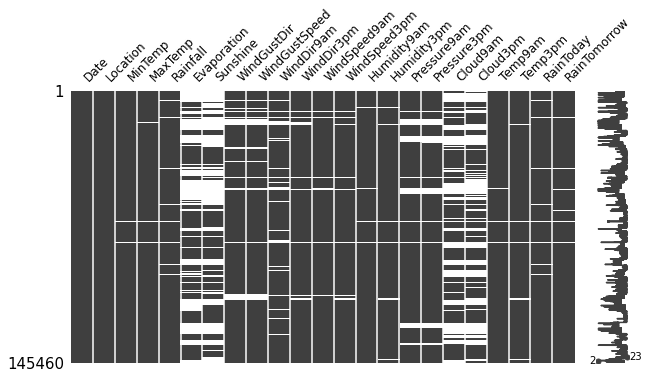

In [ ]:
import missingno
missingno.matrix(df,figsize=(10,5), fontsize=12);

In [ ]:
df_drop= df.drop(['Cloud9am','Cloud3pm','Evaporation','Sunshine','Date'], axis=1)
df_drop

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [ ]:
pd.unique(df_drop.RainToday)

array(['No', 'Yes', nan], dtype=object)

In [ ]:
pd.unique(df_drop.RainTomorrow)

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df_drop= df_drop.dropna ()

In [ ]:
(3261/145460)*100 

2.2418534304963567

In [ ]:
median = df_drop['MinTemp'].median()
df_drop['MinTemp'].fillna(median, inplace=True)
median = df_drop['MinTemp'].median()
median = df_drop['MaxTemp'].median()
df_drop['MaxTemp'].fillna(median, inplace=True)
median = df_drop['MaxTemp'].median()
median = df_drop['Rainfall'].median()
df_drop['Rainfall'].fillna(median, inplace=True)
median = df_drop['Rainfall'].median
median = df_drop['Temp9am'].median()
df_drop['Temp9am'].fillna(median, inplace=True)
median = df_drop['Temp9am'].median
median = df_drop['Temp3pm'].median()
df_drop['Temp3pm'].fillna(median, inplace=True)
median = df_drop['Temp3pm'].median

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
median = df_drop['Humidity9am'].median()
df_drop['Humidity9am'].fillna(median, inplace=True)
median = df_drop['Humidity9am'].median()
median = df_drop['Humidity3pm'].median()
df_drop['Humidity3pm'].fillna(median, inplace=True)
median = df_drop['Humidity3pm'].median()
median = df_drop['WindSpeed9am'].median()
df_drop['WindSpeed9am'].fillna(median, inplace=True)
median = df_drop['WindSpeed9am'].median()
median = df_drop['WindSpeed3pm'].median()
df_drop['WindSpeed3pm'].fillna(median, inplace=True)
median = df_drop['WindSpeed3pm'].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
median = df_drop['WindGustSpeed'].median()
df_drop['WindGustSpeed'].fillna(median, inplace=True)
median = df_drop['WindGustSpeed'].median()
median = df_drop['Pressure9am'].median()
df_drop['Pressure9am'].fillna(median, inplace=True)
median = df_drop['Pressure9am'].median()
median = df_drop['Pressure3pm'].median()
df_drop['Pressure3pm'].fillna(median, inplace=True)
median = df_drop['Pressure3pm'].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df_drop["WindGustDir"]
le.fit(comment)
list(le.classes_)
df_drop['WindGustDir']=le.transform(df_drop['WindGustDir'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df_drop["WindDir9am"]
le.fit(comment)
list(le.classes_)
df_drop['WindDir9am']=le.transform(df_drop['WindDir9am'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df_drop["WindDir3pm"]
le.fit(comment)
list(le.classes_)
df_drop['WindDir3pm']=le.transform(df_drop['WindDir3pm'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df_drop["WindDir9am"]
le.fit(comment)
list(le.classes_)
df_drop['WindDir9am']=le.transform(df_drop['WindDir9am'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df_drop["WindDir3pm"]
le.fit(comment)
list(le.classes_)
df_drop['WindDir3pm']=le.transform(df_drop['WindDir3pm'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df_drop["Location"]
le.fit(comment)
list(le.classes_)
df_drop['Location']=le.transform(df_drop['Location'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df_drop["WindGustDir"]
le.fit(comment)
list(le.classes_)
df_drop['WindGustDir']=le.transform(df_drop['WindGustDir'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df_drop["RainToday"]
le.fit(comment)
list(le.classes_)
df_drop['RainToday']=le.transform(df_drop['RainToday'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df_drop["RainTomorrow"]
le.fit(comment)
list(le.classes_)
df_drop['RainTomorrow']=le.transform(df_drop['RainTomorrow'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_drop

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,36,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,36,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,36,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,36,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


In [ ]:
pd.unique(df_drop.Location)

array([ 1,  3,  9, 10, 20, 23, 24, 30, 32, 33, 37, 40, 42,  8, 35,  4,  5,
       31, 18, 17, 19, 22, 29, 39, 11,  6,  7, 13, 34,  0, 21, 25, 43, 41,
       26, 28, 27, 38, 14, 16,  2, 12, 15, 36])

In [ ]:
pd.unique(df_drop.RainToday)

array([0, 1])

In [ ]:
pd.unique(df_drop.MinTemp)

array([13.4,  7.4, 12.9,  9.2, 17.5, 14.6, 14.3,  7.7,  9.7, 13.1, 15.9,
       12.6, 14.1, 13.5, 11.2,  9.8, 11.5, 17.1, 20.5, 15.3, 16.2, 20.1,
       19.7, 12.5, 12. , 11.3,  9.6, 10.5, 12.3, 13.7, 16.1, 14. , 17. ,
       16.9, 17.3, 17.2, 17.4, 19.8, 14.9, 13.9, 18.6, 19.3, 24.4, 18.8,
       20.8, 15.7, 18.5, 20.4, 21.8, 22.3, 22. , 28. , 21.5, 23.5, 28.3,
       18.4, 13.3, 18. , 18.7, 15.5, 15. , 12.8, 13.2, 13.8,  8.3, 11. ,
       20.9, 16.4, 10. ,  8.8,  8.4,  9.3, 10.8, 15.4,  9.1,  7.8,  8.1,
        7.5,  8.2, 11.6, 13. ,  9.9, 10.7,  6.6,  7. ,  5.7, 10.6,  8.6,
        4.5,  7.6,  5.4,  7.2,  4.6,  4.2,  4.1,  3.2,  4.3,  3.6,  6.9,
       10.3, 12.4,  3. ,  5.1,  4.7,  6.2,  8.9,  2.8,  9. ,  6.3, -1.3,
        1.8,  0.5,  0.9,  5. ,  3.9,  3.4,  0. ,  5.9, -0.3,  0.8,  6. ,
        1.3,  6.5,  8. , -0.8, -1. ,  1.9,  2.7,  1.6,  5.5,  7.3,  0.2,
        5.8,  7.1,  1.1,  6.7,  1. ,  6.1,  2.1,  3.7,  5.3,  6.8,  1.7,
        4. , 11.7,  8.5,  5.2,  1.2,  6.4,  9.5, 14

In [ ]:
pd.unique(df_drop.MaxTemp)

array([22.9, 25.1, 25.7, 28. , 32.3, 29.7, 25. , 26.7, 31.9, 30.1, 30.4,
       21.7, 18.6, 21. , 20.9, 22.5, 25.6, 29.3, 33. , 31.8, 30.9, 32.4,
       33.9, 32.7, 27.2, 24.2, 24.4, 26.5, 23.9, 28.8, 34.6, 35.8, 37.9,
       38.9, 28.3, 28.4, 30.8, 32. , 34.7, 37.7, 43. , 32.2, 36.6, 39.9,
       38.1, 34. , 35.2, 30.6, 34.3, 38.4, 38.2, 40.7, 41.5, 42.9, 42.7,
       43.1, 38.3, 41.2, 42.2, 44.8, 40.2, 31.2, 27.3, 21.6, 29. , 31.3,
       31.1, 29.1, 31.7, 33.2, 29.6, 30.3, 22.1, 22. , 27.9, 30.2, 30.5,
       27. , 19.7, 21.9, 25.3, 33.5, 30. , 22.3, 28.9, 29.9, 28.1, 21.4,
       24. , 24.9, 25.4, 23.4, 16.2, 15.8, 12.9, 11.5, 14.5, 12.2, 19.2,
       18.9, 19.1, 19.3, 18.4, 17.7, 18.5, 15.1, 16.3, 16.6, 16.4, 15.6,
       19.8, 20.3, 18.1, 14.3, 17.4, 16.1, 11.6, 12. ,  8.8, 10.5,  8.2,
       12.4, 15.3, 17.3, 17. , 14.9, 15.5, 14.1, 13.7, 11.9, 12.3, 15.7,
       13.3, 13.2, 12.1, 16.5, 13.1, 11. , 14.4, 13.5, 12.7, 13.8, 13.9,
       14.8, 17.5, 13.6, 17.1, 12.8, 16.7, 17.9, 11

In [ ]:
df_drop.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
df_MinTemp=df_drop['MinTemp'].max()
df_MinTemp

33.9

In [ ]:
df_MinTemp=df_drop['MinTemp'].min()
df_MinTemp

-8.2

In [ ]:
df_MaxTemp=df_drop['MaxTemp'].max()
df_MaxTemp

48.1

In [ ]:
df_MaxTemp=df_drop['MaxTemp'].min()
df_MaxTemp

2.6

In [ ]:
df_WindGustSpeed=df_drop['WindGustSpeed'].max()
df_WindGustSpeed

135.0

In [ ]:
df_WindGustSpeed=df_drop['WindGustSpeed'].min()
df_WindGustSpeed

7.0

In [ ]:
df_WindGustSpeed=df_drop['WindSpeed9am'].min()
df_WindGustSpeed

2.0

In [ ]:
df_WindGustSpeed=df_drop['WindSpeed9am'].max()
df_WindGustSpeed

87.0

In [ ]:
df_WindGustSpeed=df_drop['WindSpeed3pm'].max()
df_WindGustSpeed

87.0

In [ ]:
df_WindGustSpeed=df_drop['WindSpeed3pm'].min()
df_WindGustSpeed

2.0

In [ ]:
df_WindGustSpeed=df_drop['Humidity9am'].min()
df_WindGustSpeed

0.0

In [ ]:
df_WindGustSpeed=df_drop['Humidity9am'].max()
df_WindGustSpeed

100.0

In [ ]:
df_WindGustSpeed=df_drop['Humidity3pm'].max()
df_WindGustSpeed

100.0

In [ ]:
df_WindGustSpeed=df_drop['Humidity3pm'].min()
df_WindGustSpeed

0.0

In [ ]:
df_WindGustSpeed=df_drop['Pressure9am'].min()
df_WindGustSpeed

980.5

In [ ]:
df_WindGustSpeed=df_drop['Pressure9am'].max()
df_WindGustSpeed

1041.0

In [ ]:
df_WindGustSpeed=df_drop['Pressure3pm'].max()
df_WindGustSpeed

1039.6

In [ ]:
df_WindGustSpeed=df_drop['Pressure3pm'].min()
df_WindGustSpeed

977.1

In [ ]:
df_WindGustSpeed=df_drop['Temp9am'].min()
df_WindGustSpeed


-3.1

In [ ]:
df_WindGustSpeed=df_drop['Temp9am'].max()
df_WindGustSpeed

40.2

In [ ]:
df_WindGustSpeed=df_drop['Temp3pm'].max()
df_WindGustSpeed

46.7

In [ ]:
df_WindGustSpeed=df_drop['Temp3pm'].min()
df_WindGustSpeed

1.7

In [ ]:
cordia=df_drop.corr()
print(cordia)

               Location   MinTemp   MaxTemp  Rainfall  WindGustDir  \
Location       1.000000 -0.009515 -0.050913 -0.004546     0.032909   
MinTemp       -0.009515  1.000000  0.728942  0.103807    -0.166074   
MaxTemp       -0.050913  0.728942  1.000000 -0.076825    -0.224415   
Rainfall      -0.004546  0.103807 -0.076825  1.000000     0.044939   
WindGustDir    0.032909 -0.166074 -0.224415  0.044939     1.000000   
WindGustSpeed  0.085213  0.159176  0.056742  0.130388     0.134843   
WindDir9am    -0.019989 -0.066436 -0.248406  0.084177     0.403542   
WindDir3pm     0.022470 -0.168547 -0.178135  0.046577     0.601054   
WindSpeed9am   0.086070  0.150577 -0.006114  0.085376     0.023290   
WindSpeed3pm   0.084724  0.146078  0.013976  0.060288     0.099502   
Humidity9am    0.012638 -0.218312 -0.517188  0.238756     0.071479   
Humidity3pm    0.043686  0.026733 -0.497679  0.259652     0.049654   
Pressure9am    0.044653 -0.433645 -0.312597 -0.167595    -0.139715   
Pressure3pm    0.058

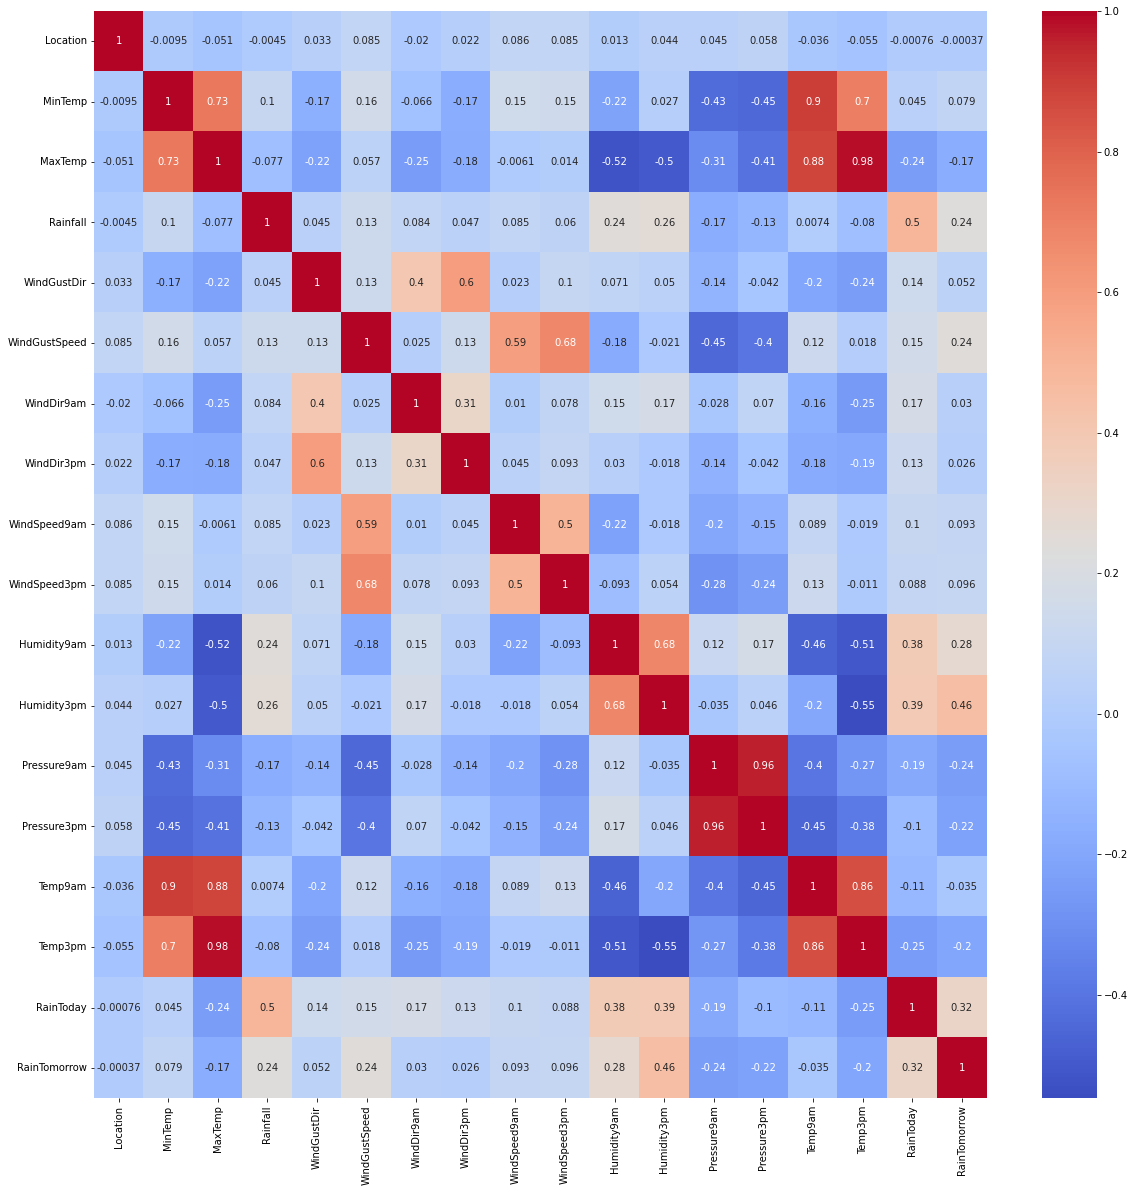

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(cordia,annot=True, square =False,  cmap="coolwarm")

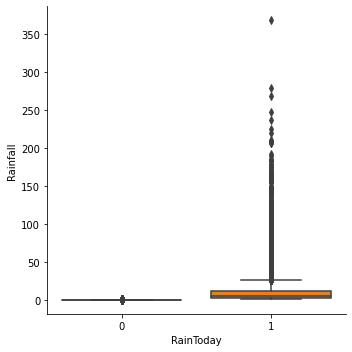

In [ ]:
sns.catplot(x="RainToday", y="Rainfall", kind="box", data=df_drop)

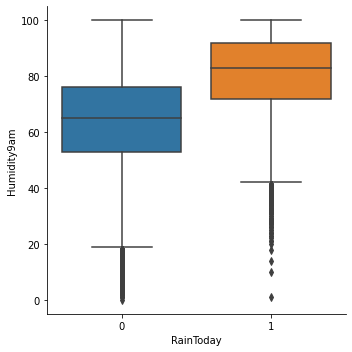

In [ ]:
sns.catplot(x="RainToday", y="Humidity9am", kind="box", data=df_drop)

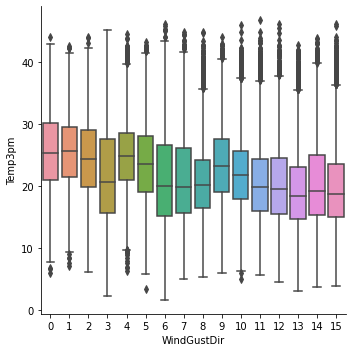

In [ ]:
sns.catplot(x="WindGustDir", y="Temp3pm", kind="box", data=df_drop)

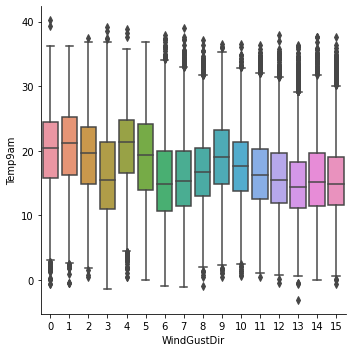

In [ ]:
sns.catplot(x="WindGustDir", y="Temp9am", kind="box", data=df_drop)

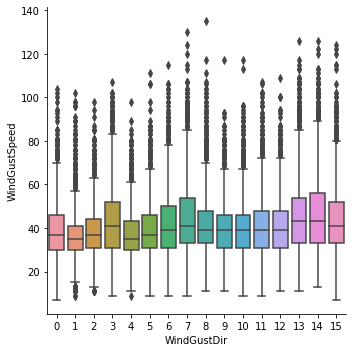

In [ ]:
sns.catplot(x="WindGustDir", y="WindGustSpeed", kind="box", data=df_drop)

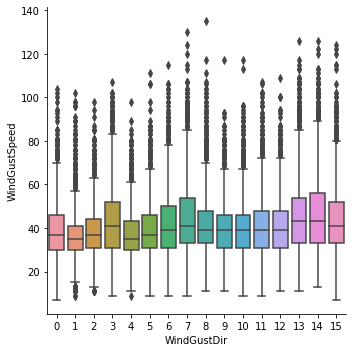

In [ ]:
sns.catplot(x="WindGustDir", y="WindGustSpeed", kind="box", data=df_drop)

In [ ]:
y = df_drop['RainToday']
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainToday, Length: 112925, dtype: int64

In [ ]:
X = df_drop.drop(columns=['RainToday'])
X

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,36,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0
145455,36,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0
145456,36,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0
145457,36,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0


In [ ]:
X

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,36,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0
145455,36,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0
145456,36,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0
145457,36,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_test

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
103841,25,4.1,11.6,0.0,10,31.0,10,8,13.0,13.0,77.0,64.0,1034.9,1032.2,9.0,11.1,0
73140,19,15.1,31.1,0.0,7,43.0,3,7,20.0,17.0,41.0,21.0,1016.2,1013.9,20.8,28.9,0
91576,13,12.9,22.4,0.0,8,35.0,8,9,30.0,22.0,49.0,50.0,1024.5,1021.2,19.8,20.3,0
93576,34,21.8,30.9,0.0,3,30.0,7,3,19.0,17.0,65.0,55.0,1013.8,1008.8,26.5,29.0,0
144345,36,7.3,19.9,0.0,0,48.0,2,2,20.0,24.0,71.0,33.0,1028.8,1025.9,10.9,19.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,24,19.3,23.0,10.0,9,41.0,10,8,24.0,24.0,85.0,79.0,1004.8,1004.2,20.2,22.2,1
48650,8,8.8,14.0,9.6,8,17.0,11,0,7.0,11.0,99.0,78.0,1019.0,1018.3,10.6,13.2,0
63803,31,2.5,14.6,0.2,2,28.0,11,0,6.0,20.0,99.0,77.0,1027.6,1024.3,7.9,13.7,0
29354,30,8.9,27.4,0.0,13,30.0,3,10,7.0,9.0,56.0,28.0,1021.0,1017.1,14.8,25.0,0


In [ ]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
107575,43,14.0,34.1,0.0,7,50.0,3,7,22.0,13.0,16.0,7.0,1016.8,1013.1,25.5,32.6,0
9767,10,21.7,25.3,7.6,11,26.0,11,11,6.0,13.0,88.0,83.0,1007.0,1005.7,24.4,22.6,1
79711,39,12.7,23.5,0.0,11,35.0,10,12,6.0,19.0,93.0,54.0,1021.9,1020.4,14.4,22.5,0
105208,25,5.7,11.3,3.9,9,26.0,0,9,7.0,9.0,81.0,67.0,1024.8,1021.4,8.6,10.9,0
131238,14,5.8,15.7,0.0,6,26.0,6,5,15.0,9.0,79.0,57.0,1031.6,1027.9,8.5,14.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32014,32,14.0,22.1,0.0,1,28.0,13,1,13.0,13.0,93.0,59.0,1027.2,1022.7,14.3,21.4,0
63200,31,7.0,20.3,0.0,13,31.0,13,12,17.0,9.0,80.0,46.0,1023.0,1018.8,12.6,19.9,0
59632,5,4.8,17.5,0.2,15,28.0,15,8,11.0,11.0,74.0,53.0,1021.9,1020.1,10.6,16.7,0
60695,5,21.9,30.5,0.0,13,52.0,14,13,19.0,31.0,65.0,39.0,1009.9,1010.0,23.7,29.4,0


In [ ]:
y_train

107575    0
9767      1
79711     0
105208    1
131238    0
         ..
32014     0
63200     0
59632     0
60695     0
88326     1
Name: RainToday, Length: 90340, dtype: int64

In [ ]:
y_test

103841    0
73140     0
91576     0
93576     0
144345    0
         ..
22278     1
48650     1
63803     0
29354     0
23139     0
Name: RainToday, Length: 22585, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN 
ngh = KNN(n_neighbors=3)
Kb = ngh.fit(X_train,y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
Ypred_knn=Kb.predict(X_test)
Ypred_knn

array([1, 0, 0, ..., 0, 0, 0])

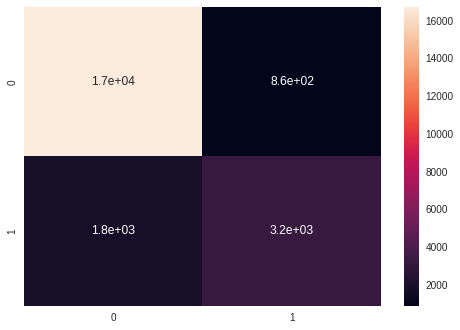

In [ ]:
sns.heatmap(confusion_matrix(y_test,Ypred_knn),annot=True)
plt.show()

In [ ]:
Ypred_knn=Kb.predict(X_test)
print(Ypred_knn[1])

0


In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range) 
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 13}


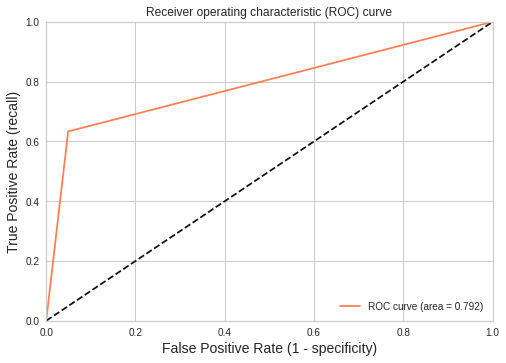

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
y_pred_proba = Kb.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, Ypred_knn)
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV as GCV
acc(y_test,Ypred_knn)

0.8804073500110693

In [ ]:
from sklearn.metrics import roc_auc_score
ngh = KNN(n_neighbors=3)
Kb = ngh.fit(X_train,y_train)
roc_auc_score(y,Kb.predict_proba(X)[:, 1])

0.9559597742411323

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,Ypred_knn, average='macro')

0.8133378440384567

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute')

In [ ]:
y_pred_knn_cv=grid_search.predict(X_test)
print(y_pred_knn_cv[1])

0


In [ ]:
y_pred_knn_cv_train=grid_search.predict(X_train)
print(y_pred_knn_cv_train[1])

1


In [ ]:
print(accuracy_score(y_test,y_pred_knn_cv))
print(accuracy_score(y_train, y_pred_knn_cv_train))

0.8896170024352447
0.901748948417091


In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
y = df_drop['RainToday']
X = df_drop.drop(columns=['RainToday'])
classifier = KNN()
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(classifier, X, y, cv=skf)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.8860356  0.86744001 0.87098202 0.8565483  0.86292394 0.84546582
 0.8618491  0.87672689 0.87938363 0.89045342]


In [ ]:
#SVM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
Ypred_svc=clf.predict(X_test)
Ypred_svc

array([0, 0, 0, ..., 0, 0, 0])

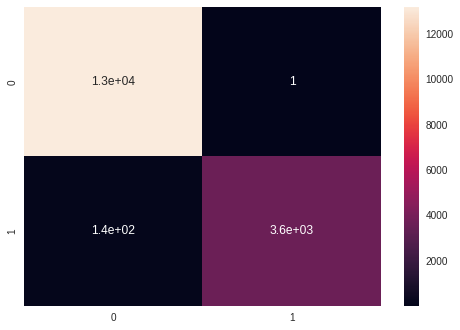

In [ ]:
sns.heatmap(confusion_matrix(y_test,Ypred_svc),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
clf.get_params()

{'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC(gamma='auto'))],
 'svc': SVC(gamma='auto'),
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'auto',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False,
 'verbose': False}

In [ ]:
#  anomiser un dataframe
def anomiser(df):
# lecture du dataframe
  for row in df.itertuples():
    

In [ ]:
def function(x):
  res=0
  if x<= 10:
    res+=x
    elif x>= 1 and x < 0:
      res+=2
    else:
      res -=2
    return res

In [11]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
from sklearn.metrics import confusion_matrix
import sys
import missingno
from sklearn.neighbors import KNeighborsClassifier
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [6]:
import pandas as pd
telemetry_df = pd.read_csv('/PdM_telemetry.csv')
errors_df = pd.read_csv('/PdM_errors (1).csv')
maint_df = pd.read_csv('/PdM_maint.csv')
failures_df = pd.read_csv('/PdM_failures.csv')
machines_df = pd.read_csv('/PdM_machines.csv')

# Format date & time. Sort based on date for better readability
tables = [telemetry_df, maint_df, failures_df, errors_df]
for df in tables:
    df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")
    df.sort_values(["datetime", "machineID"], inplace=True, ignore_index=True)

In [8]:
failures_df.head(n=10)

,datetime,machineID,failure
0,2015-01-02 03:00:00,16,comp1
1,2015-01-02 03:00:00,16,comp3
2,2015-01-02 03:00:00,17,comp4
3,2015-01-02 03:00:00,22,comp1
4,2015-01-02 03:00:00,35,comp1
5,2015-01-02 03:00:00,45,comp1
6,2015-01-02 03:00:00,51,comp1
7,2015-01-02 03:00:00,56,comp3
8,2015-01-02 03:00:00,58,comp2
9,2015-01-02 03:00:00,59,comp1


In [12]:
pip install  missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


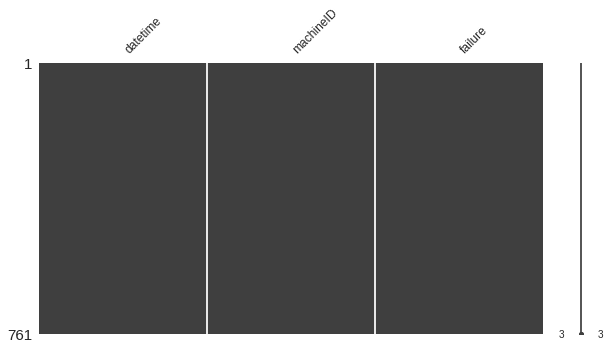

In [20]:
missingno.matrix(failures_df,figsize=(10,5), fontsize=12);

In [21]:
print(failures_df.isnull().sum())

datetime     0
machineID    0
failure      0
dtype: int64


In [9]:
pd.unique(failures_df.machineID)

array([ 16,  17,  22,  35,  45,  51,  56,  58,  59,  73,  79,  80,  83,
        86,  87,  94,  99,  24,  81,  20,  37,  40,   1,  23,  64,  69,
        84,   3,  12,  75,   5,  30,  27,  32,  48,  71,  19,  62,  54,
        85,  67,   4,  38,  76,  10,  52,  88,  11,  15,  90,  42,  21,
        74,   7,  47,  97,  63,  70,  82,  18,  50,  60,  98,  14,  33,
        41,  91,  43,  78,  57,  89, 100,  96,  66,  92,  95,  36,  46,
        61,  49,  29,   9,  25,   8,  55,  44,  28,  65,  93,   2,  31,
        72,  53,  39,  68,  26,  13,  34])

In [16]:
# Check failure record of machine 16
sel_fail = failures_df.loc[failures_df['machineID'] == 16]
pd.DataFrame(sel_fail)

,datetime,machineID,failure
0,2015-01-02 03:00:00,16,comp1
1,2015-01-02 03:00:00,16,comp3
50,2015-01-17 06:00:00,16,comp1
148,2015-03-03 06:00:00,16,comp3
210,2015-04-02 06:00:00,16,comp1
304,2015-05-17 06:00:00,16,comp3
336,2015-06-01 06:00:00,16,comp2
362,2015-06-16 06:00:00,16,comp1
394,2015-07-01 06:00:00,16,comp2
395,2015-07-01 06:00:00,16,comp3


In [37]:
errors_df = pd.read_csv('/PdM_errors (1).csv')

In [36]:
sel_err = errors_df.loc[errors_df['machineID'] == 11]
pd.DataFrame(sel_err).head()

,datetime,machineID,errorID
207,2015-01-19 06:00:00,11,error2
208,2015-01-19 06:00:00,11,error3
502,2015-02-15 01:00:00,11,error4
548,2015-02-18 06:00:00,11,error4
629,2015-02-26 23:00:00,11,error4


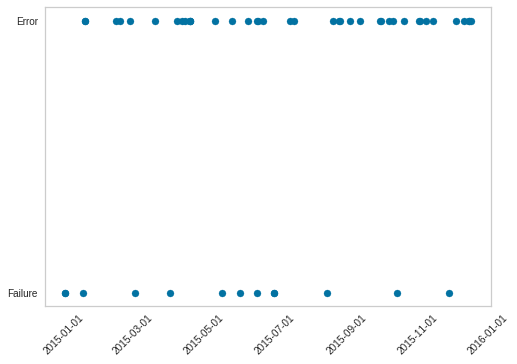

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

# For a simpler plot, we will use two different values in the y-axis to differentiate between error and failure
y_category = list()

for iter in range(0, len(sel_fail)):
  y_category.append('Failure')

for iter in range(0, len(sel_err)):
  y_category.append('Error')

# Get timestamp from error and selected failure
df_timestamp = pd.concat([sel_fail['datetime'], sel_err['datetime']], ignore_index=True, axis=0)
df_plot = pd.DataFrame({"timestamp": df_timestamp, "category": y_category})
df_plot.loc[:, 'timestamp'] = pd.to_datetime(df_plot.loc[:, 'timestamp'])
df_plot.sort_values(by=['timestamp'], inplace=True, ignore_index=True)


# Plot the data with timestamp as x-axis
ax.scatter('timestamp', 'category', data = df_plot)
yearfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(yearfmt)
ax.tick_params(axis='x', rotation=45)
ax.grid()

In [18]:
maint_df.head(n=10)

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-06-01 06:00:00,6,comp2
2,2014-06-01 06:00:00,9,comp1
3,2014-06-01 06:00:00,9,comp2
4,2014-06-01 06:00:00,11,comp2
5,2014-06-01 06:00:00,16,comp4
6,2014-06-01 06:00:00,18,comp3
7,2014-06-01 06:00:00,19,comp4
8,2014-06-01 06:00:00,20,comp1
9,2014-06-01 06:00:00,20,comp2


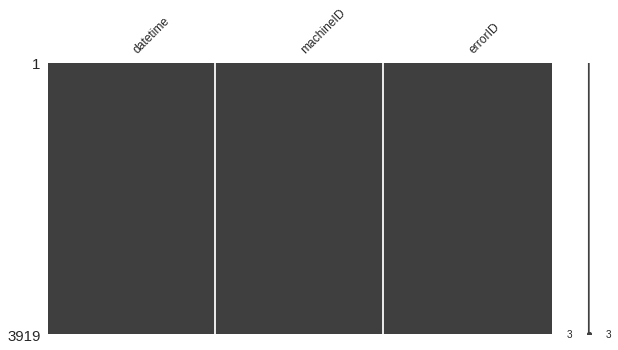

In [19]:
missingno.matrix(df,figsize=(10,5), fontsize=12);

In [22]:
maint_df

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-06-01 06:00:00,6,comp2
2,2014-06-01 06:00:00,9,comp1
3,2014-06-01 06:00:00,9,comp2
4,2014-06-01 06:00:00,11,comp2
...,...,...,...
3281,2016-01-01 06:00:00,35,comp2
3282,2016-01-01 06:00:00,42,comp4
3283,2016-01-01 06:00:00,43,comp1
3284,2016-01-01 06:00:00,55,comp3


In [23]:
machines_df = pd.read_csv('/PdM_machines.csv')

In [24]:
machines_df.head(n=10)

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
5,6,model3,7
6,7,model3,20
7,8,model3,16
8,9,model4,7
9,10,model3,10


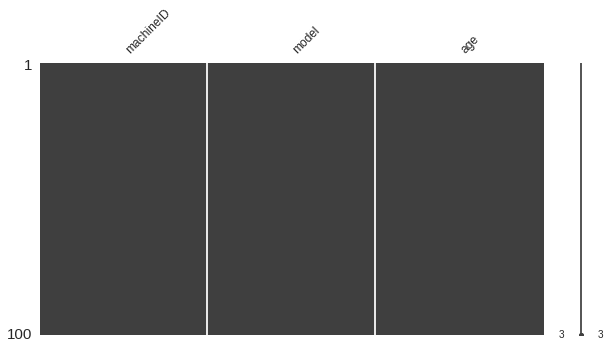

In [25]:
missingno.matrix(machines_df,figsize=(10,5), fontsize=12);

In [26]:
print(machines_df.isnull().sum())

machineID    0
model        0
age          0
dtype: int64


In [27]:
telemetry_df = pd.read_csv('/PdM_telemetry.csv')

In [29]:
telemetry_df.head(n=10)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
5,2015-01-01 11:00:00,1,172.504839,430.323362,95.927042,35.655017
6,2015-01-01 12:00:00,1,156.556031,499.071623,111.755684,42.753920
7,2015-01-01 13:00:00,1,172.522781,409.624717,101.001083,35.482009
8,2015-01-01 14:00:00,1,175.324524,398.648781,110.624361,45.482287
9,2015-01-01 15:00:00,1,169.218423,460.850670,104.848230,39.901735


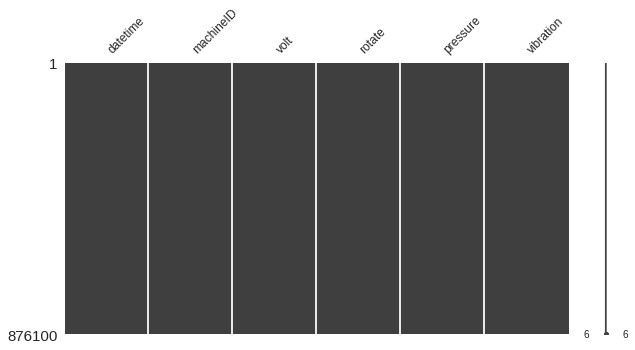

In [31]:
missingno.matrix(telemetry_df,figsize=(10,5), fontsize=12);

In [32]:
print(telemetry_df.isnull().sum())

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64


In [30]:
pd.unique(telemetry_df.machineID)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [33]:
# Check failure record of machine 16
sel_telemetry_df = telemetry_df.loc[telemetry_df['machineID'] == 16]
pd.DataFrame(sel_telemetry_df)

,datetime,machineID,volt,rotate,pressure,vibration
131415,2015-01-01 06:00:00,16,178.290159,468.798740,153.422157,42.077466
131416,2015-01-01 07:00:00,16,216.476672,300.540218,134.044480,38.158899
131417,2015-01-01 08:00:00,16,192.209115,441.141487,123.434529,41.294661
131418,2015-01-01 09:00:00,16,207.467201,471.102256,124.845330,37.436764
131419,2015-01-01 10:00:00,16,180.306643,355.204896,129.855268,32.576688
...,...,...,...,...,...,...
140171,2016-01-01 02:00:00,16,166.331869,356.305089,104.513640,42.964619
140172,2016-01-01 03:00:00,16,193.105673,476.080235,93.909347,45.585342
140173,2016-01-01 04:00:00,16,165.233630,466.342691,96.292475,48.400964
140174,2016-01-01 05:00:00,16,188.219242,543.471426,86.716004,47.271358


In [41]:
df_sel = telemetry_df.loc[telemetry_df['machineID'] == 11].reset_index(drop=True)
df_sel.head(n=10)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,11,164.039259,389.699577,113.619975,29.775109
1,2015-01-01 07:00:00,11,180.325510,409.788550,97.506203,40.512160
2,2015-01-01 08:00:00,11,146.917119,420.626012,97.087205,33.420937
3,2015-01-01 09:00:00,11,164.895416,426.409611,86.494413,40.263365
4,2015-01-01 10:00:00,11,174.330072,471.774231,109.277816,39.931749
5,2015-01-01 11:00:00,11,135.334852,430.893352,89.296812,34.682423
6,2015-01-01 12:00:00,11,173.477507,291.886484,82.135450,48.153468
7,2015-01-01 13:00:00,11,190.724129,441.605222,106.944370,34.957043
8,2015-01-01 14:00:00,11,152.468194,401.542452,113.549808,37.319643
9,2015-01-01 15:00:00,11,177.754003,444.963805,80.922557,37.191099


Text(0, 0.5, 'Rotation')

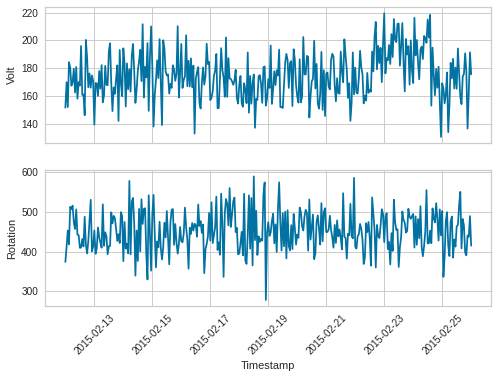

In [45]:
# Change datatype of the timestamp column from object to datetime
df_sel.loc[:, 'datetime'] = pd.to_datetime(df_sel.loc[:, 'datetime'])

# Select the date to check from failure records
st = df_sel.loc[df_sel['datetime'] == "2015-02-19"].index.values[0]

# Then, filter the telemetry data by the date and allow 7 days before and after
# the error occurs to observe any abnormalities.
select = df_sel.loc[st-7*24:st + 7*24,:]

# Plot volt and rotation feature
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot('datetime', 'volt', data=select)
ax[0].set_ylabel("Volt")

ax[1].plot('datetime', 'rotate', data=select)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel("Timestamp")
ax[1].set_ylabel("Rotation")

Text(0, 0.5, 'vibration')

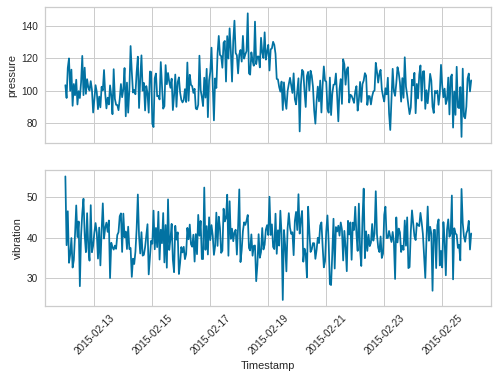

In [50]:
# Change datatype of the timestamp column from object to datetime
df_sel.loc[:, 'datetime'] = pd.to_datetime(df_sel.loc[:, 'datetime'])

# Select the date to check from failure records
st = df_sel.loc[df_sel['datetime'] == "2015-02-19"].index.values[0]

# Then, filter the telemetry data by the date and allow 7 days before and after
# the error occurs to observe any abnormalities.
select = df_sel.loc[st-7*24:st + 7*24,:]

# Plot volt and rotation feature
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot('datetime', 'pressure', data=select)
ax[0].set_ylabel("pressure")

ax[1].plot('datetime', 'vibration', data=select)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel("Timestamp")
ax[1].set_ylabel("vibration")